Contributors: **Rohit Singh Rathaur, Girish L.** 

Copyright [2021](2021) [*Rohit Singh Rathaur, BIT Mesra and Girish L., CIT GUBBI, Karnataka*]

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

We mounted the drive to access the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We are importing libraries to read the CSV and to train the models

In [ ]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

We are reading CSV file using `read_csv` function and dropping the `Timestamp` column and storing it in a DataFrame called `df_Ellis`.

In [ ]:
df_Ellis  = pd.read_csv("/content/drive/MyDrive/Failure/lstm/Ellis_FinalTwoConditionwithOR.csv")
df_Ellis=df_Ellis.drop(columns='Timestamp')
df_Ellis

,ellis-cpu.system_perc,ellis-cpu.wait_perc,ellis-load.avg_1_min,ellis-mem.free_mb,ellis-net.in_bytes_sec,ellis-net.out_packets_sec,Label
0,0.5,12.9,1.730,3949,5413.200,62.067,1
1,0.4,10.3,1.790,3950,5201.667,59.567,1
2,0.4,11.8,1.520,3950,5370.733,61.200,1
3,0.4,12.9,1.430,3949,5292.467,60.400,1
4,0.5,12.1,1.440,3950,5318.167,61.700,1
...,...,...,...,...,...,...,...
176995,0.4,0.3,0.030,3484,230.967,2.167,0
176996,0.2,0.3,0.018,3484,218.433,0.767,0
176997,0.6,0.3,0.010,3483,160.967,1.867,0
176998,0.6,0.3,0.007,3484,188.367,2.100,0


First we stored the `feature_cols` and defined the `X` matrix and `y` vector where `X` is a matrix and containing all the feature matrix and `y` is a vector which is having target value.

In [ ]:

# define X and y
feature_cols = ['ellis-cpu.wait_perc',	'ellis-load.avg_1_min',	'ellis-net.in_bytes_sec','ellis-cpu.system_perc','ellis-mem.free_mb']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = df_Ellis[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = df_Ellis.Label

We splitted `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split` function.

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

We are training the model with Decision Tree.

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# instantiate model
logreg=tree.DecisionTreeClassifier()

# fit model
logreg.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

We are making predictions for test set

In [ ]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

Here, we are calculating the accuracy using `sklearn` library

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6620338983050847


We are examining the class distribution of the testing set using a `pandas` series method

In [ ]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    33686
1    19414
Name: Label, dtype: int64

We counted the value for each lables

In [ ]:
y_train.value_counts()

0    78460
1    45440
Name: Label, dtype: int64

We are calculating the percentage of ones because `y_test` only contains ones and zeroes, we can simply calculate the mean = percentage of ones

In [ ]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.3656120527306968

We are calculating the percentage of zeros

In [ ]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6343879472693033

In [ ]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.6343879472693033

In [ ]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.634388
Name: Label, dtype: float64

In [ ]:

# print the first 25 true and predicted responses
print('True:', y_test.values[0:50])
print('False:', y_pred_class[0:50])

True: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 1 0 0 1]
False: [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0]


In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[24355  9331]
 [ 8615 10799]]


In [ ]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[24355  9331]
 [ 8615 10799]]


In [ ]:

# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6620338983050847
0.6620338983050847


We are defining a function `print_results` to print the result of `y_test` and `y_pred`.

In [ ]:
def print_results(y_test, y_pred):
    
    #f1-score
    f1 = metrics.f1_score(y_test, y_pred)
    print("F1 Score: ", f1)
    print(classification_report(y_test, y_pred))
    
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    b, t = plt.ylim()
    plt.ylim(b + 0.5, t - 0.5)
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    #roc_auc_score
    model_roc_auc = metrics.roc_auc_score(y_test, y_pred) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = metrics.roc_curve(y_test, y_pred)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    threshold = np.round(thresholds[ix],3)

    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold:' + str(threshold))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

F1 Score:  0.5461764110863848
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     33686
           1       0.54      0.56      0.55     19414

    accuracy                           0.66     53100
   macro avg       0.64      0.64      0.64     53100
weighted avg       0.66      0.66      0.66     53100

Area under curve :  0.6396243607472745 



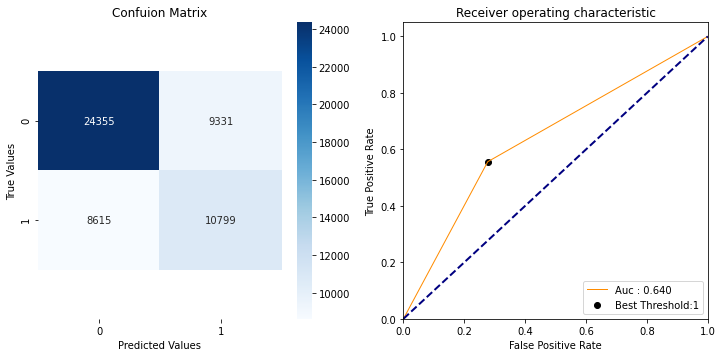

In [ ]:
import sklearn.metrics as metrics
import seaborn as sns

from sklearn.metrics import classification_report
print_results(y_test, y_pred_class)